# Filtering Cells in SpatialData

This notebook provides a comprehensive example of how to use the `squidpy.pp.filter_cells` function to filter cells from a `SpatialData` object. We begin by creating a synthetic dataset using `spatialdata.datasets.blobs_annotating_element`, which includes various spatial elements like labels, shapes, and points.

The core of the notebook demonstrates the application of `filter_cells` to this `SpatialData` object, using the `min_counts` parameter to remove cells with low counts. To illustrate the impact of this filtering step, we present a series of before-and-after visualizations. These plots, generated for shapes, labels, and points, clearly show which cells have been removed from the dataset, providing a clear and intuitive understanding of the filtering process. This example is designed to be a general guide to the cell filtering functionality in Squidpy.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import spatialdata_plot as _
from anndata import AnnData
from spatialdata import SpatialData, concatenate
from spatialdata.datasets import blobs_annotating_element

import squidpy as sq


/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [2]:

keys_dict = {
    "labels": "blobs_labels",
    "shapes": "blobs_circles",
    "points": "blobs_points",
    "multiscale_labels": "blobs_multiscale_labels",
}
sdata_dicts = {
    k: blobs_annotating_element(v) for k, v in keys_dict.items()
}

n = sdata_dicts["labels"].tables['table'].shape[0]
X = np.zeros((n, 10))
for i in range(n):
    X[i, :] = 100 if i % 2 == 0 else 0
for key, value in sdata_dicts.items():
    n = value['table'].shape[0]
    X = np.zeros((n, 10))
    X[np.arange(0, n, 2), :] = 100
    value['table'] = AnnData(
        X=X,
        obs=value['table'].obs,
        var={"var_names": ["feature_1", "feature_2", "feature_3", "feature_4", "feature_5", "feature_6", "feature_7", "feature_8", "feature_9", "feature_10"]},
        uns=value['table'].uns,
    )

sdata = concatenate(
    sdata_dicts,
    concatenate_tables=True,
)
sdata = SpatialData.init_from_elements(
    tables={'table': sdata['table']},
    elements={
        f"{k}-{v}": sdata[f"{k}-{v}"] for v,k in keys_dict.items()
    }
)
sdata



/Users/selman/projects/spatialdata/src/spatialdata/models/models.py:1144: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/Users/selman/projects/spatialdata/src/spatialdata/models/models.py:1144: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/Users/selman/projects/spatialdata/src/spatialdata/models/models.py:1144: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/Users/selman/projects/spatialdata/src/spatialdata/models/models.py:1144: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/Users/selman/projects/spatialdata/src/spatialdata/models/models.py:1144: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/Users/selman/projects/spatial

SpatialData object
├── Labels
│     ├── 'blobs_labels-labels': DataArray[yx] (50, 50)
│     └── 'blobs_multiscale_labels-multiscale_labels': DataTree[yx] (50, 50), (25, 25), (12, 12)
├── Points
│     └── 'blobs_points-points': DataFrame with shape: (<Delayed>, 4) (2D points)
├── Shapes
│     └── 'blobs_circles-shapes': GeoDataFrame shape: (5, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (215, 10)
with coordinate systems:
    ▸ 'global', with elements:
        blobs_labels-labels (Labels), blobs_multiscale_labels-multiscale_labels (Labels), blobs_points-points (Points), blobs_circles-shapes (Shapes)

In [3]:
sdata_filtered = sq.pp.filter_cells(
    sdata,
    tables='table',
    min_counts=50,
    inplace=False,
)

sdata_filtered

WARNING  Creating a deepcopy of the SpatialData object, depending on the size of the object this can take a while. 


/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:128: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:128: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:118: UserWarning: Key `blobs_points-points` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:108: UserWarning: Key `blobs_circles-shapes` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:91: UserWarning: Key `blobs_labels-labels` already exists. Overwriting it in-memory.
  self._check_key(key, self.

SpatialData object
├── Labels
│     ├── 'blobs_labels-labels': DataArray[yx] (50, 50)
│     └── 'blobs_multiscale_labels-multiscale_labels': DataTree[yx] (50, 50), (25, 25), (12, 12)
├── Points
│     └── 'blobs_points-points': DataFrame with shape: (<Delayed>, 4) (2D points)
├── Shapes
│     └── 'blobs_circles-shapes': GeoDataFrame shape: (3, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (109, 10)
with coordinate systems:
    ▸ 'global', with elements:
        blobs_labels-labels (Labels), blobs_multiscale_labels-multiscale_labels (Labels), blobs_points-points (Points), blobs_circles-shapes (Shapes)

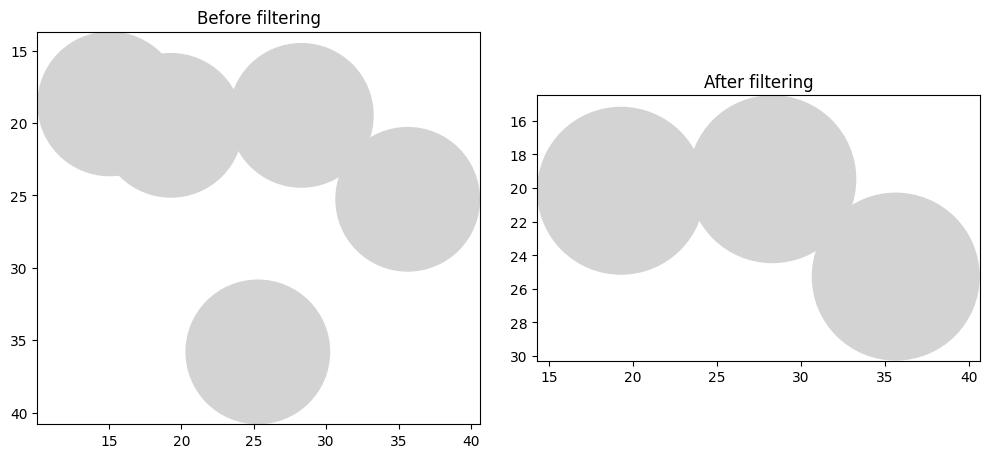

In [4]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sdata.pl.render_shapes().pl.show(ax=axs[0], title='Before filtering')
sdata_filtered.pl.render_shapes().pl.show(ax=axs[1], title='After filtering')
plt.tight_layout()
plt.show()

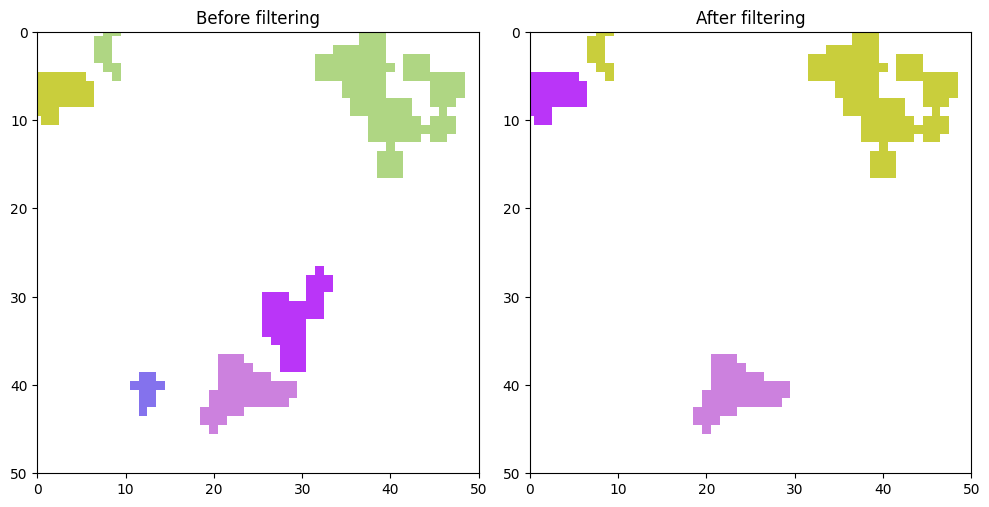

In [5]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sdata.pl.render_labels().pl.show(ax=axs[0], title='Before filtering')
sdata_filtered.pl.render_labels().pl.show(ax=axs[1], title='After filtering')
plt.tight_layout()
plt.show()

/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:118: UserWarning: Key `blobs_points-points` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/spatialdata_plot/pl/render.py:708: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = ax.scatter(
/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecat

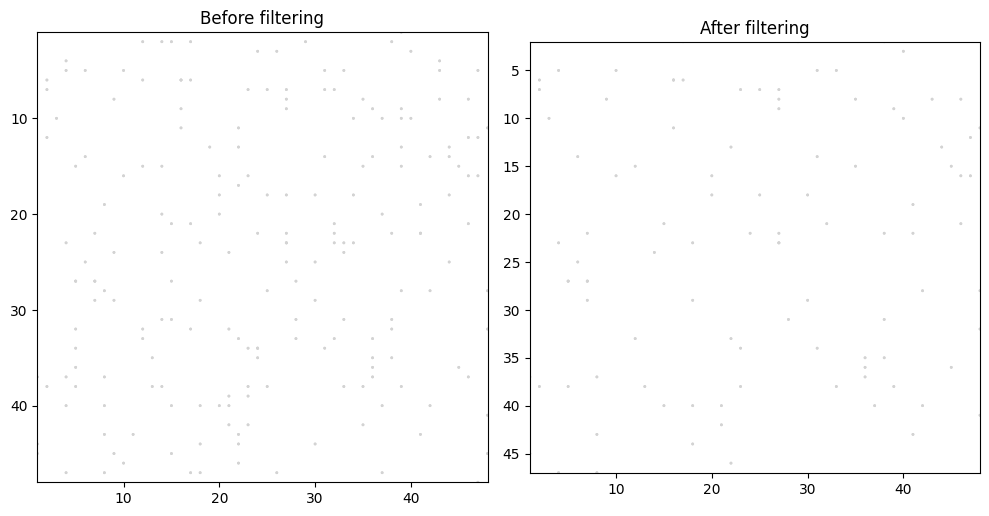

In [6]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sdata.pl.render_points().pl.show(ax=axs[0], title='Before filtering')
sdata_filtered.pl.render_points().pl.show(ax=axs[1], title='After filtering')
plt.tight_layout()
plt.show()